In [ ]:

import pandas as pd

df = pd.read_csv('D:\mobadra non tech\project 2\googleplaystore.csv')

In [52]:
import pandas as pd

df = pd.read_csv('D:\mobadra non tech\project 2\googleplaystore.csv',na_values=(['NaN']))

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('D:/mobadra non tech/project 2/googleplaystore.csv', na_values=['NaN', 'varies with device'])

# Replace specific values with NaN
df['Size'] = df['Size'].replace(['Varies with device', '1000+'], np.nan)

# Function to preprocess the size column
def preprocess_size(size):
    if pd.isna(size):
        return size
    if 'M' in size:
        return size.replace('M', '')
    elif 'K' in size:
        return str(float(size.replace('k', '')) / 1000)
    else:
        return size

# Apply the preprocessing function to the 'Size' column
df['Size'] = df['Size'].apply(preprocess_size)

# Convert the preprocessed size column to numeric
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Check the number of NaN values in the 'Size' column
print(df['Size'].isna().sum())
df.info()

2012
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            8829 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [15]:
df['Price'] = df['Price'].replace('Everyone', np.nan)
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace('+', '').replace(',', '') if isinstance(x, str) else x)
df['Price'] = df['Price'].astype(float)
df['Price'].isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            8829 non-null   float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [16]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  object        
 4   Size            8829 non-null   float64       
 5   Installs        10841 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.1+ MB


In [17]:
df['Reviews'] = df['Reviews'].replace('3.0M', '3000000')
df['Reviews'] = df['Reviews'].astype(int)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int32         
 4   Size            8829 non-null   float64       
 5   Installs        10841 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 1.0+ MB


In [36]:
df['Rating'] = df['Rating'].replace('19', np.nan)
df['Rating'] = df['Rating'].astype(float)
df.describe()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


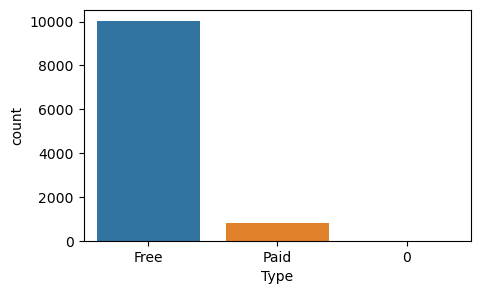

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5,3))

fig = sns.countplot(x=df['Type'])

fig.set_xticklabels(fig.get_xticklabels())

plt.show(fig)

C:\Users\pc\AppData\Local\Temp\ipykernel_22980\2111262616.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(x='Installs', y='Size', data=df, palette="hls")
C:\Users\pc\AppData\Local\Temp\ipykernel_22980\2111262616.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(fig.get_xticklabels(), rotation=90)


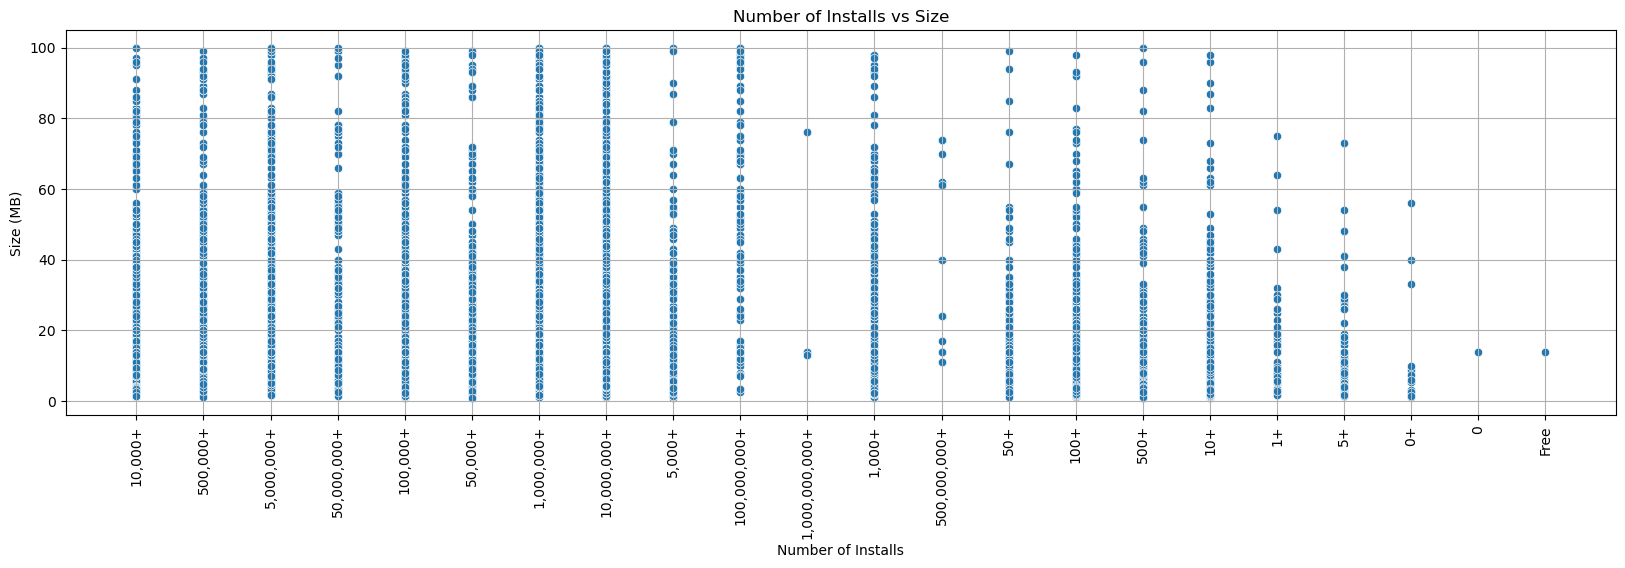

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(20, 5))
fig = sns.scatterplot(x='Installs', y='Size', data=df, palette="hls")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title('Number of Installs vs Size')
plt.xlabel('Number of Installs')
plt.ylabel('Size (MB)')
plt.grid(True)
plt.show()


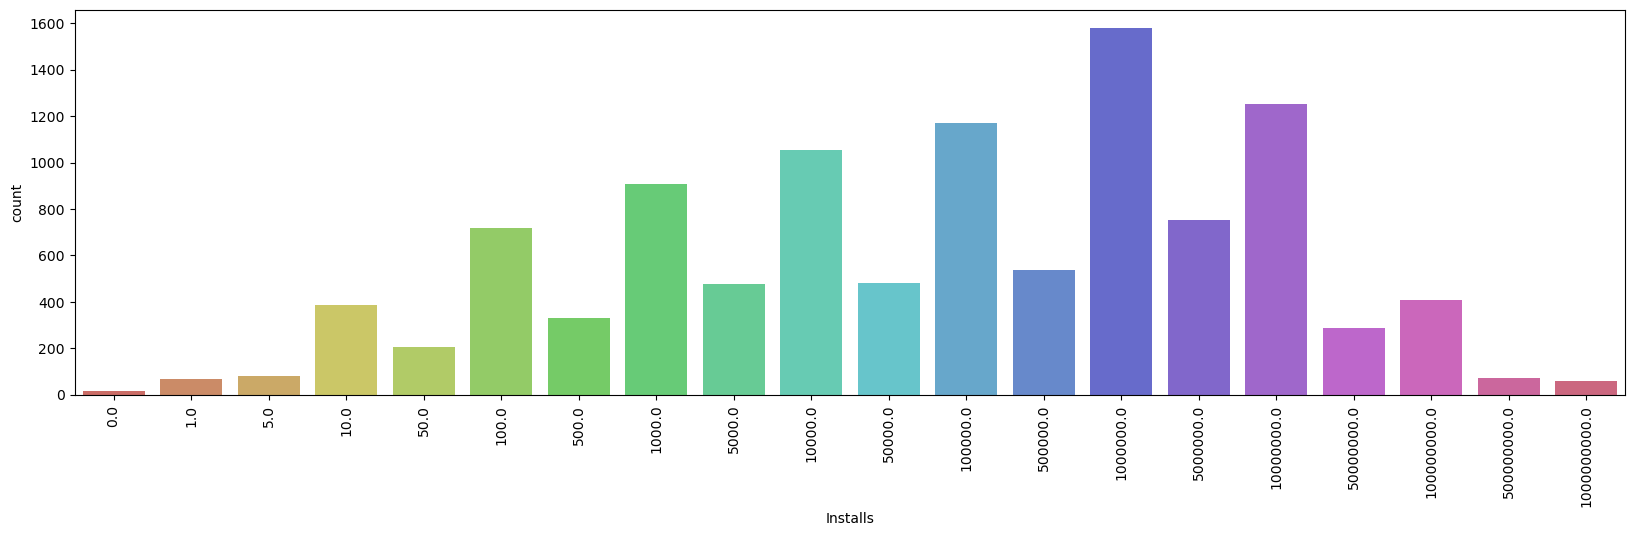

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

C:\Users\pc\AppData\Local\Temp\ipykernel_22980\1385881094.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: overflow encountered in scalar add
  boot_dist.append(f(*sample, **func_kwargs))
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: overflow encountered in scalar add
  boot_dist.append(f(*sample, **func_kwargs))
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: overflow encountered in scalar add
  boot_dist.append(f(*sample, **func_kwargs))
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: overflow encountered in scalar add
  boot_dist.append(f(*sample

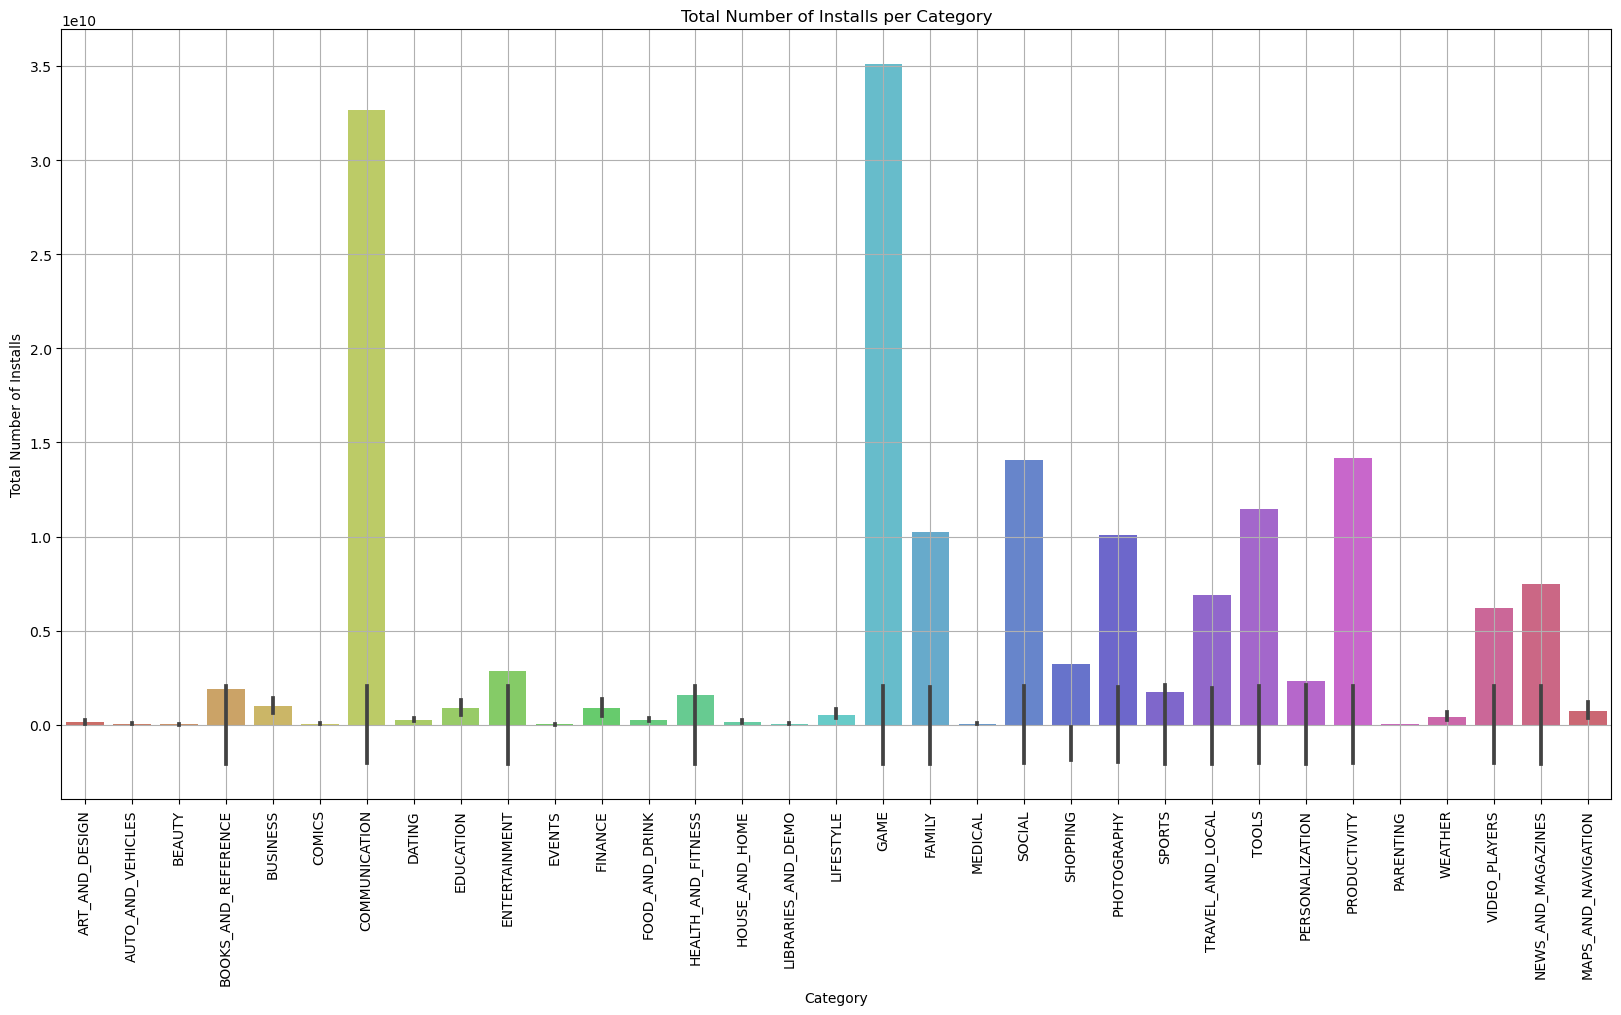

In [56]:
df = df.drop(df[df['Installs'] == 'Free'].index)

df['Category'].unique()

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Create a bar plot to show the average installs per category
plt.figure(figsize=(20, 10))
fig = sns.barplot(x='Category', y='Installs', data=df, estimator=sum, palette="hls")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title('Total Number of Installs per Category')
plt.xlabel('Category')
plt.ylabel('Total Number of Installs')
plt.grid(True)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: overflow encountered in scalar add
  boot_dist.append(f(*sample, **func_kwargs))


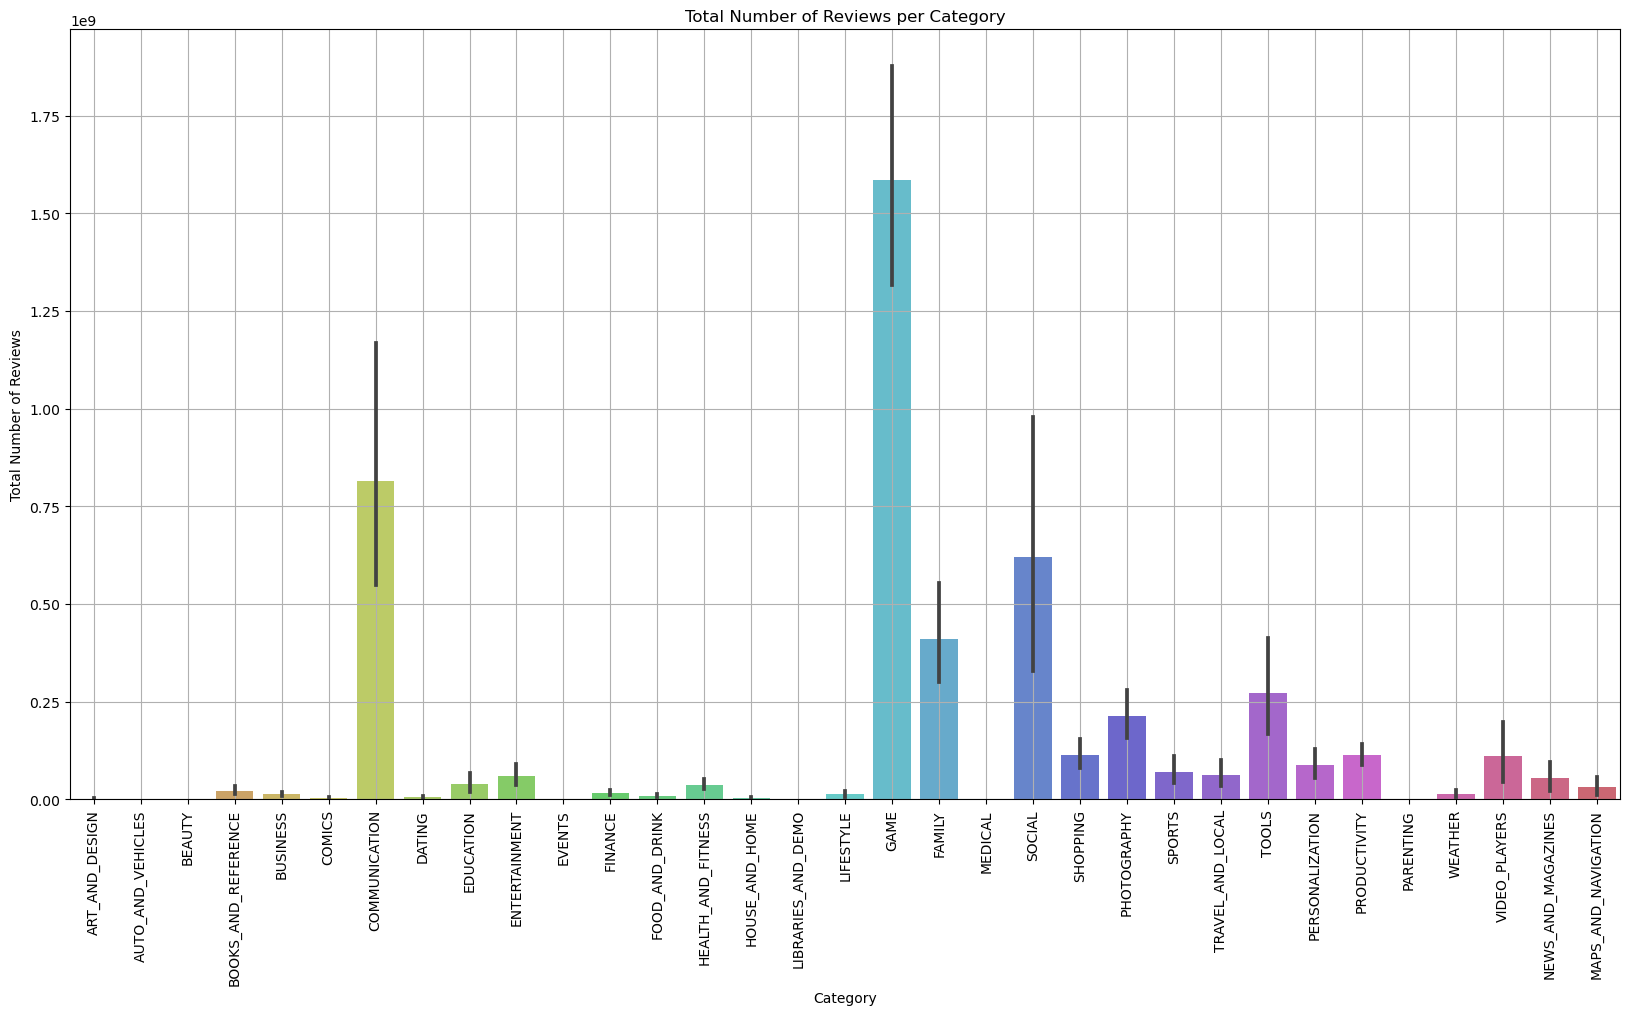

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Ensure the 'Reviews' column is in numerical format
df['Reviews'] = df['Reviews'].astype(int)

# Create a bar plot to show the total number of reviews per category
plt.figure(figsize=(20, 10))
fig = sns.barplot(x='Category', y='Reviews', data=df, estimator=sum, palette="hls")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.title('Total Number of Reviews per Category')
plt.xlabel('Category')
plt.ylabel('Total Number of Reviews')
plt.grid(True)
plt.show()